In [1]:
import sys
from matplotlib import pylab
import numpy as np
from PySDM import Formulae
from PySDM.physics import si
from PySDM.physics import constants_defaults as const
from atmos_cloud_sim_uj_utils import show_plot
from PySDM_examples.Singer_Ward.aerosol import AerosolBetaCaryophylleneDark

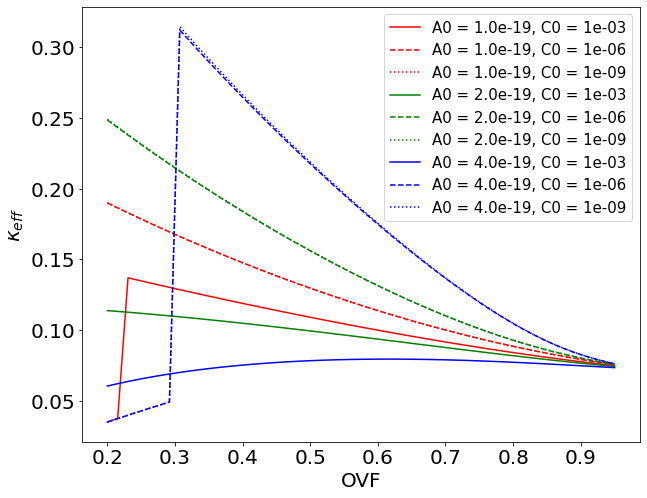

In [2]:
from scipy.optimize import minimize_scalar

from importlib import reload
import kappa_mcmc
reload(kappa_mcmc)
from kappa_mcmc import negSS

col = ['r','g','b']
ls = ['-','--',':']

pylab.figure(figsize=(10,8))
pylab.rcParams.update({"font.size":20})

for a,A0 in enumerate([10e-20,20e-20,40e-20]):
    for c,C0 in enumerate([1e-3,1e-6,1e-9]):
        ovf = np.linspace(0.2,0.95,50)
        T = 300.0
        rd = 50e-9 * np.ones(50)
        rw = 300e-9
        aerosol = AerosolBetaCaryophylleneDark(ovf)
        nu = aerosol.modes[0]['nu_org'][0]
        f_org = aerosol.modes[0]['f_org']
        kappa = aerosol.modes[0]['kappa']['SzyszkowskiLangmuir']

        formulae = Formulae(
            surface_tension='SzyszkowskiLangmuir',
            constants={
                'RUEHL_nu_org': nu,
                'RUEHL_A0': A0 * si.m * si.m,
                'RUEHL_C0': C0,
                'RUEHL_sgm_min': 40.0 * si.mN / si.m
            }
        )

        v_dry = formulae.trivia.volume(rd)
        v_wet = formulae.trivia.volume(rw)
        sigma = formulae.surface_tension.sigma(T, v_wet, v_dry, f_org)
        
        Scrit, rcrit = np.zeros(len(ovf)), np.zeros(len(ovf))
        for i,o in enumerate(ovf):
            arg = [formulae, T, rd[i], kappa[i], f_org[i]]
            res = minimize_scalar(negSS, args=arg)
            Scrit[i], rcrit[i] = -1*res.fun, res.x
            
        kap_eff = (2 * rcrit**2) / (3 * rd**3 * const.Rv * T * const.rho_w) * const.sgm_w
        pylab.plot(ovf, kap_eff, color=col[a], linestyle=ls[c],label=f"A0 = {A0:.1e}, C0 = {C0:.0e}")

pylab.legend(fontsize=15)
pylab.xlabel("OVF")
pylab.ylabel("$\kappa_{eff}$")
pylab.show()

[5.0e-08 5.0e-08 5.0e-08 5.0e-08 5.0e-08 5.0e-08 5.0e-08 5.0e-08 7.0e-08
 7.0e-08 7.0e-08 7.0e-08 7.0e-08 7.0e-08 7.0e-08 7.0e-08 7.0e-08 7.0e-08
 7.0e-08 7.0e-08 7.0e-08 7.0e-08 7.0e-08 8.0e-08 8.0e-08 8.0e-08 9.0e-08
 9.0e-08 9.0e-08 9.0e-08 9.0e-08 9.0e-08 9.0e-08 9.0e-08 9.0e-08 9.0e-08
 1.1e-07 1.1e-07 1.1e-07 5.0e-08 5.0e-08 5.0e-08 5.0e-08 5.0e-08 5.0e-08
 5.0e-08 5.0e-08 7.0e-08 7.0e-08 7.0e-08 7.0e-08 7.0e-08 7.0e-08 7.0e-08
 7.0e-08 7.0e-08 7.0e-08 7.0e-08 7.0e-08 7.0e-08 7.0e-08 7.0e-08 8.0e-08
 8.0e-08 8.0e-08 9.0e-08 9.0e-08 9.0e-08 9.0e-08 9.0e-08 9.0e-08 9.0e-08
 9.0e-08 9.0e-08 9.0e-08 1.1e-07 1.1e-07 1.1e-07]


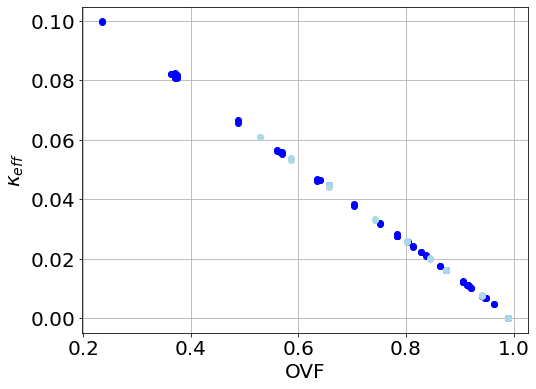

In [3]:
pylab.figure(figsize=(8,6))
pylab.rcParams.update({'font.size':20})

#################

ds = np.loadtxt("data/bcary_dark.csv",skiprows=1,delimiter=",")
r_dry = ds[:,0]*1e-9
ovf = np.minimum(ds[:,1], 0.99)
kappa_eff = ds[:,2]
T = 300 * si.K
print(r_dry)

datay = kappa_eff
errory = datay*0.1

args = [T, r_dry, ovf]

pylab.plot(ovf, kappa_eff, 'bo')

#################

ds = np.loadtxt("data/bcary_light.csv",skiprows=1,delimiter=",")
r_dry = ds[:,0]*1e-9
ovf = np.minimum(ds[:,1], 0.99)
kappa_eff = ds[:,2]
T = 300 * si.K

datay = kappa_eff
errory = datay*0.1

args = [T, r_dry, ovf]

pylab.plot(ovf, kappa_eff, 'o', color="lightblue")

#################

pylab.xlabel("OVF")
pylab.ylabel("$\kappa_{eff}$")
pylab.rcParams.update({'font.size':20})
pylab.grid()
pylab.show()